In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import requests
import os

In [2]:
DATA_PATH = 'data/'

In [3]:
POL_PREC_FILENAME = DATA_PATH +'Police Precincts.zip'

In [4]:
POL_PREC_URL = "https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nypp_23d.zip"

In [5]:
IS_DOWNLOAD_DATASETS = True

# POLICE PRECINTS
Columns descriptions: https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/nypp_metadata.pdf

## Download Police precincts file locally or copy directly from link

In [6]:
if IS_DOWNLOAD_DATASETS:
    if not os.path.isfile(POL_PREC_FILENAME):
        response = requests.get(POL_PREC_URL)
        if response.status_code == 200:
            with open(POL_PREC_FILENAME, 'wb') as file:
                file.write(response.content)
            print(f'File {POL_PREC_FILENAME} has been successfully downloaded and saved.')
        else:
            print(f'Unable to download the file. HTTP response code: {response.status_code}')
    else:
        print(f'File {POL_PREC_FILENAME} already exists on the disk.')
    police_df = gpd.read_file(POL_PREC_FILENAME)
else:
    police_df = gpd.read_file(POL_PREC_URL)
    print(f"Data has been copied from the link {POL_PREC_URL}")

File data/Police Precincts.zip already exists on the disk.


## Print Police Precincts locations

In [7]:
police_df[:-10]

,precinct,shape_area,shape_leng,geometry
0,1.0,4.728501e+07,80093.534429,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5.0,1.809453e+07,18807.124911,"POLYGON ((-73.98864 40.72293, -73.98869 40.722..."
2,6.0,2.201795e+07,24875.964217,"POLYGON ((-73.99968 40.73855, -73.99684 40.737..."
3,7.0,1.836667e+07,17287.544493,"POLYGON ((-73.97346 40.71896, -73.97357 40.718..."
4,9.0,2.139539e+07,19772.510741,"POLYGON ((-73.97161 40.72672, -73.97163 40.726..."
...,...,...,...,...
62,105.0,3.475194e+08,134121.252264,"POLYGON ((-73.74630 40.63644, -73.74638 40.636..."
63,106.0,1.734075e+08,107426.593339,"MULTIPOLYGON (((-73.82639 40.64832, -73.82639 ..."
64,107.0,2.075788e+08,69279.126623,"POLYGON ((-73.75670 40.72623, -73.75637 40.725..."
65,108.0,1.394698e+08,73737.924984,"MULTIPOLYGON (((-73.96118 40.74976, -73.96133 ..."


Text(0.5, 1.0, 'Mapa okręgów policyjnych')

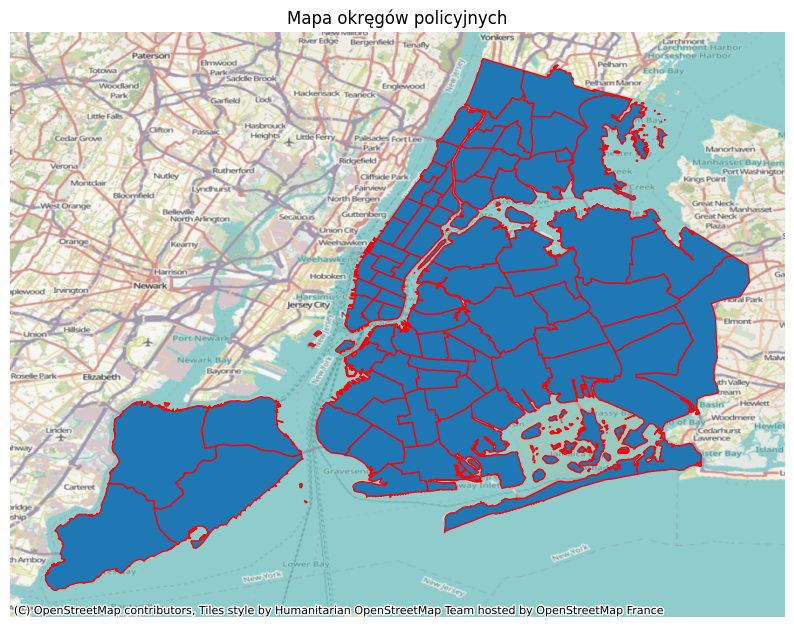

In [8]:
ax2 = police_df.plot(figsize=(10,10), edgecolor='red')
ctx.add_basemap(ax2, crs=police_df.crs.to_string())
ax2.set_axis_off()
plt.title("Mapa okręgów policyjnych")

In [9]:
police_df.shape

(77, 4)